Once deleted, variables cannot be recovered. Proceed (y/[n])? y
PSD: 500
Bandwidth: 100
Sampling frequency: 200
Length of the sequence: 100
Power= 100000.0 

Calculated PSD:  (497.4848699646565+0j) 

Input PSD:  500.0 

AWGN of given length :
 [[  52.52  -71.12 -424.5   166.66  175.91  143.48   84.72  -68.06  509.28
  -161.84  476.75   80.83  283.31  328.04  500.59 -287.26  192.97 -346.93
   338.68 -481.16  139.69 -235.44 -411.28 -461.12  -79.06  105.18 -285.73
   302.64 -386.06 -185.7   348.36  314.14  -59.16  -61.53   75.77  -55.6
   177.53  -55.77  327.05  271.16   -4.85  336.63 -376.53  -41.74  188.12
   517.54  -29.65  265.67  148.98 -144.05  258.27  462.93  -60.96 -161.19
    -7.91 -909.05  -12.44  152.74  -93.18 -243.83  320.82  356.7  -295.47
   249.48 -119.76  -54.83 -450.06  494.07  539.66 -353.03    5.65 -172.5
   275.56 -287.54 -377.66  221.39  -83.37 -224.3    33.15   65.91  123.51
  -148.75   48.1  -401.47 -627.37  324.91  433.4   182.99   15.42  489.61
   163.06 -106.05 

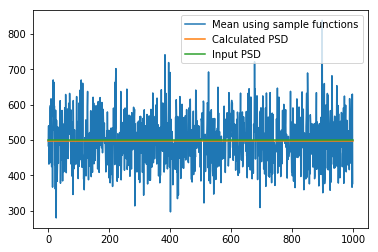

In [14]:
%reset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def myawgn(psd,bandwidth,fs,l):
    exp_x_sq=psd*2*bandwidth;
    print('Power=',exp_x_sq,'\n')
    std_dev=np.sqrt(exp_x_sq);
    arr=[];
    arr=np.random.randn(1,l)*std_dev;
    
    
    #Verifying PSD
    N=1000 #Number of sample functions
        
    #Producing N sample functions with the same length, mean, variance to verify PSD
    ans=np.random.randn(N,l)*std_dev;

    # Fourier transform of each sample function
    ans_fourier=[0 for i in range(N)]   
    for n1 in range(N):
        ans_fourier[n1]=np.fft.fft(ans[n1]);

    #Taking Complex conjugate and multiplying with original and taking mean to give E[|X_t(w)|^2]/T*Fs
    ans_mean=[0 for i in range(N)]
    for n1 in range(N):
        ans_mean[n1]=np.mean(ans_fourier[n1]*np.conj(ans_fourier[n1]))/(l*fs);
        
    #Plotting the values obtained from each sample function and the final calculated PSD 
    x=range(N)
    y_calc=[np.mean(ans_mean) for i in range(N)]
    psd_input=[psd for i in range(N)]
    print('Calculated PSD: ',np.mean(ans_mean),'\n')
    print('Input PSD: ',psd,'\n')
    plt.plot(ans_mean,label='Mean using sample functions')
    plt.plot(x,y_calc,label='Calculated PSD')
    plt.plot(x,psd_input,label='Input PSD')
    plt.legend(loc=1)
    return arr;

psd=float(input('PSD: '))
bandwidth=float(input('Bandwidth: '))
fs=float(input('Sampling frequency: '))
l=int(input('Length of the sequence: '))
awgn=myawgn(psd,bandwidth,fs,l)
print('AWGN of given length :\n',awgn);


        

Once deleted, variables cannot be recovered. Proceed (y/[n])? y

Output : Printing the samples with given mean and covariance:
[[ 0.46  1.15  0.54 -5.02]
 [ 3.15  5.43  2.97 -1.52]
 [ 1.86  2.9   2.33 -4.31]
 ...
 [-3.36 -4.25 -2.38 -5.25]
 [ 1.5   3.99  2.13  0.62]
 [-2.19 -2.02 -1.66 -5.32]]


Mean of samples generated, for Verification:
[1.0069134217268938, 2.0055901546177477, 3.0046084425042334, -1.0186699948431643]


Covariance of sample generated, for verification:
[[4.94 6.91 5.92 4.91]
 [6.91 9.87 7.88 6.86]
 [5.92 7.88 9.94 8.93]
 [4.91 6.86 8.93 9.91]]


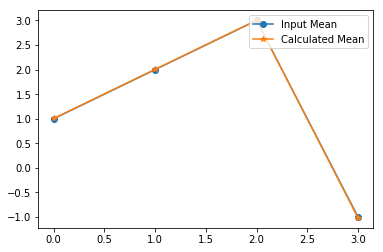

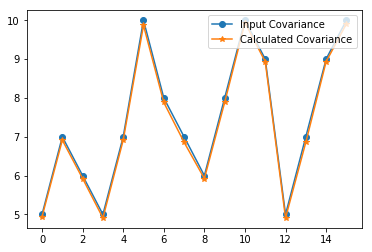

In [23]:
%reset
from matplotlib import pyplot as plt
import numpy as np
import math
import random  
from datetime import datetime
import statistics as st
import sympy as sym
import scipy.linalg as la
%matplotlib inline
np.set_printoptions(2);
random.seed(datetime.now())

def diag(mat):
    eigva,P = la.eig(mat);    
    P = np.array(P).astype(float);
    P_inv = np.linalg.inv(P);
    D = np.matmul(P_inv,mat);
    D = np.matmul(D,P);
    return D,P;

def mygauss(mean,cov,s):
    D,P = diag(cov);
    P = np.array(P).astype(float);
    D = np.array(D).astype(float);
    P_inv = np.linalg.inv(P);
    
    for i in range(0,len(D)):
        D[i][i] = np.sqrt(D[i][i]);
    
    M = np.matmul(P,D);
    M = np.matmul(M,P_inv);
    
    ans = np.matmul(np.random.randn(s, len(D)),M);
    
    for i in range(0,s):
        ans[i] = ans[i] + mean;
    print('\nOutput : Printing the samples with given mean and covariance:')
    print(ans);
    
    print('\n\nMean of samples generated, for Verification:');
    mean_calc = [];
    ans = np.transpose(ans);
    for i in range(0,len(D)):  #to verify Means
        mean_calc.append(np.mean(ans[i]));
        
    print(mean_calc);
    print('\n\nCovariance of sample generated, for verification:');
    print(np.cov(ans));       #To verify covariance
    
    #plotting mean to verify the result
    plt.figure(0)
    plt.plot(mean,marker='o',label='Input Mean')
    plt.plot(mean_calc,marker='*',label='Calculated Mean')
    plt.legend(loc=1)
    
    
    #plotting covariance as a single array just to verify
    cov_calc=np.reshape(np.cov(ans),((mean.size*mean.size),1));
    cov_ip=np.reshape(cov,((mean.size*mean.size),1));
    plt.figure(1)
    plt.plot(cov_ip,marker='o',label='Input Covariance')
    plt.plot(cov_calc,marker='*',label='Calculated Covariance')
    plt.legend(loc=1)
    
    
#Input covariance matrix    
COV = np.array([[5 ,  7  , 6  , 5],
                [7 ,  10 , 8  , 7],
                [6 ,  8 , 10 , 9],
                [5 ,  7  , 9 , 10]]);

#Input mean vector
MEAN = np.array([1,2,3,-1]);

#Number of samples to be produced
S=10000;

mygauss(MEAN,COV,S);